In [17]:
### Theoretical Concept: What is Exploratory Data Analysis (EDA)?

# Exploratory Data Analysis is the crucial process of performing initial investigations on data to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. It is not about formal modeling or hypothesis testing; rather, it is about getting to know your data before you start building models.

# Why is it important
# 1.  Understand the Data: It helps you understand the variables and their relationships.
# 2.  Data Cleaning: It reveals missing values, outliers, and other inconsistencies that need to be handled.
# 3.  Feature Selection: It helps identify which variables are the most important for your problem (feature engineering and selection).
# 4.  Assumption Checking: It allows you to check assumptions that are required for certain machine learning models (e.g., normality, linearity).

In [1]:
# STEP 1 : IMPORT ALL THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#for better visuals setting sns 
sns.set(style="whitegrid")

In [3]:
# STEP 2 : DATA LOADING AND INSPECTION 
#loading the dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')

print("First 5 sample data records of the Dataset:")
titanic_df.head()

First 5 sample data records of the Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Last 5 sample data records of the Dataset :")
titanic_df.tail()

Last 5 sample data records of the Dataset :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#count of rows and columns
titanic_df.shape

(891, 12)

In [6]:
#dispalying basic overall information about the dataset
print("\nOverall Dataset Information:")
titanic_df.info()


Overall Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#finding the basic statistical information about the dataset for eg:minimum , maximum 
print("\nStatistical Overview of Dataset:")
titanic_df.describe()


Statistical Overview of Dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#example individual column data 
titanic_df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
#STEP 3 : DATA CLEANING
#finding all the null values in the attributes/columns
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#so 'Age' and 'Cabin' have most null values followed by 'Embark'
##1.Handling missing 'Age' values by filling Median value 
median_age = titanic_df['Age'].median()
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)

In [12]:
# 2. Handle missing 'Embarked' values by filling Mode value
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

In [14]:
#checking the null values post solving
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
# 3. Handle the 'Cabin' column
# since majority of data is missing, so imputing is not a good idea. Instead, we'll create a new feature 'Has_Cabin' which will have binary values
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int) # 1 if has cabin, 0 if not
titanic_df.drop('Cabin', axis=1, inplace=True) # Drop the original column

In [16]:
# verifying that there are no more missing values in the columns after we fill them
print("Missing values after cleaning:")
titanic_df.isna().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

Analyzing categorical features:


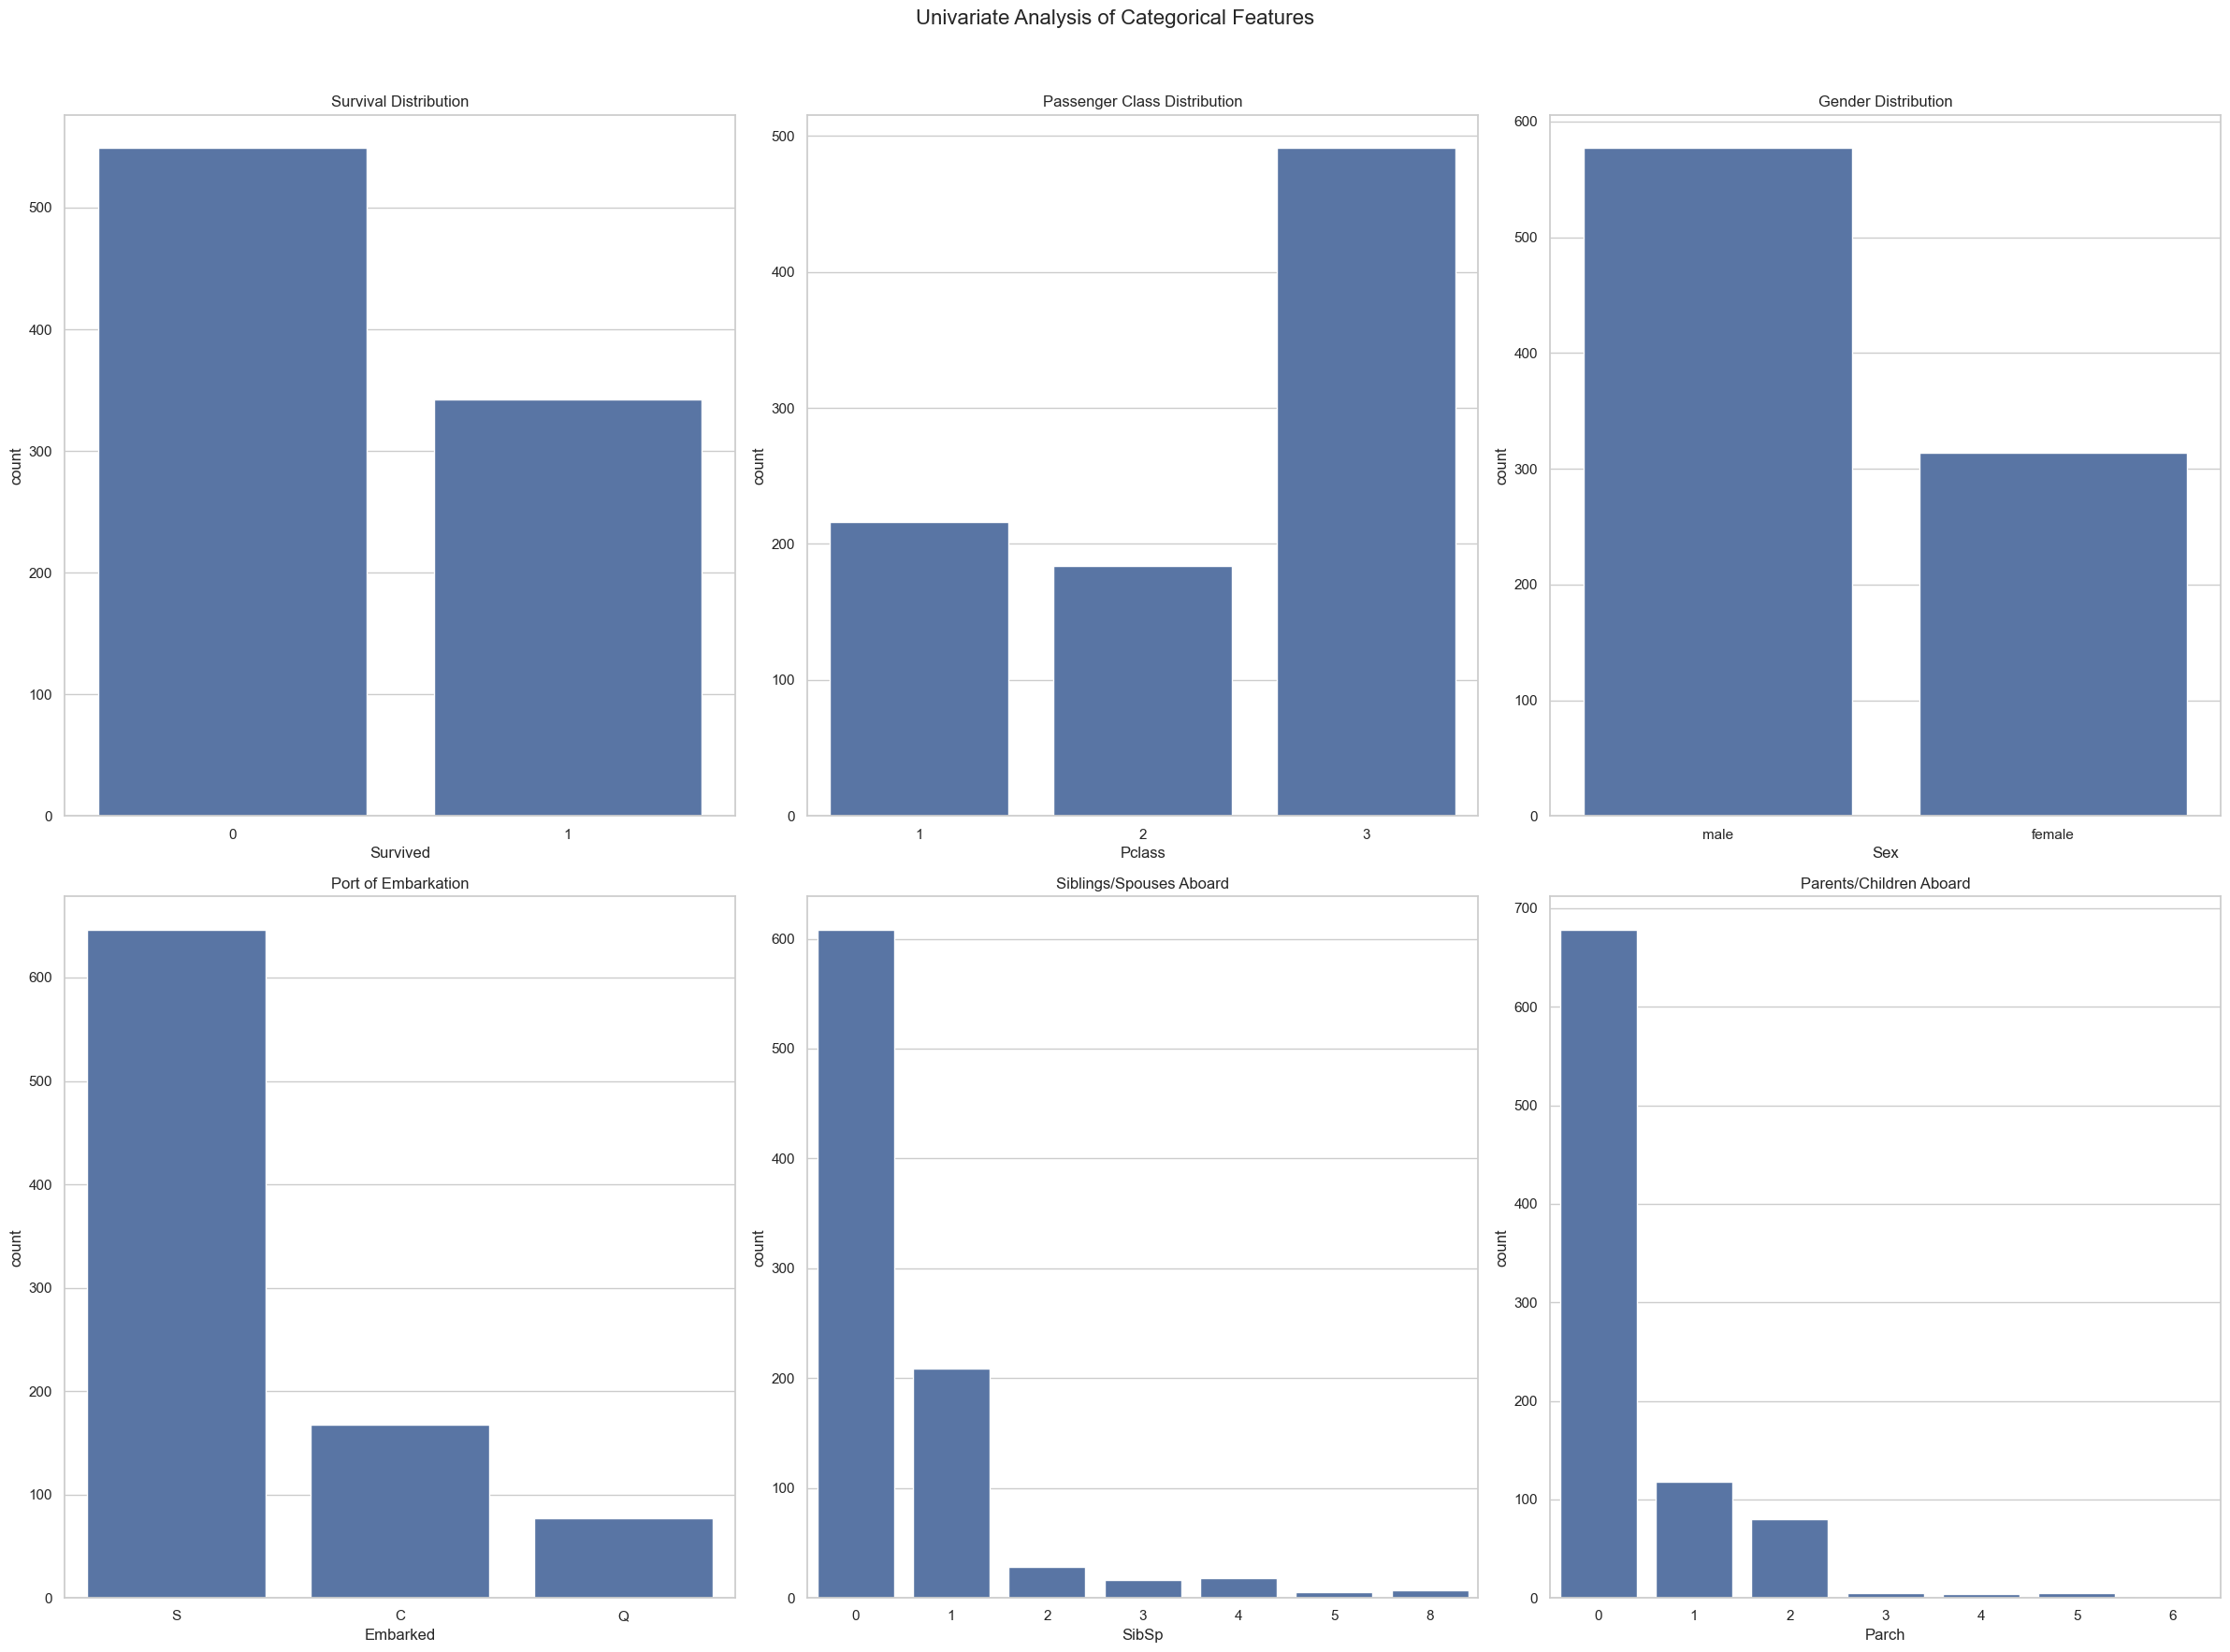

In [25]:
##STEP 4: ANALYZING THE VARIABLES
#Univariate Distribution - analyze each variable individually to understand its distribution
print("Analyzing Categorical Features:")
fig , axes = plt.subplots(2,3,figsize=(24,18));
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

sns.countplot(ax=axes[0,0], x='Survived', data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0,1], x='Pclass', data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0,2], x='Sex', data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


Analyzing the Numerical Features:


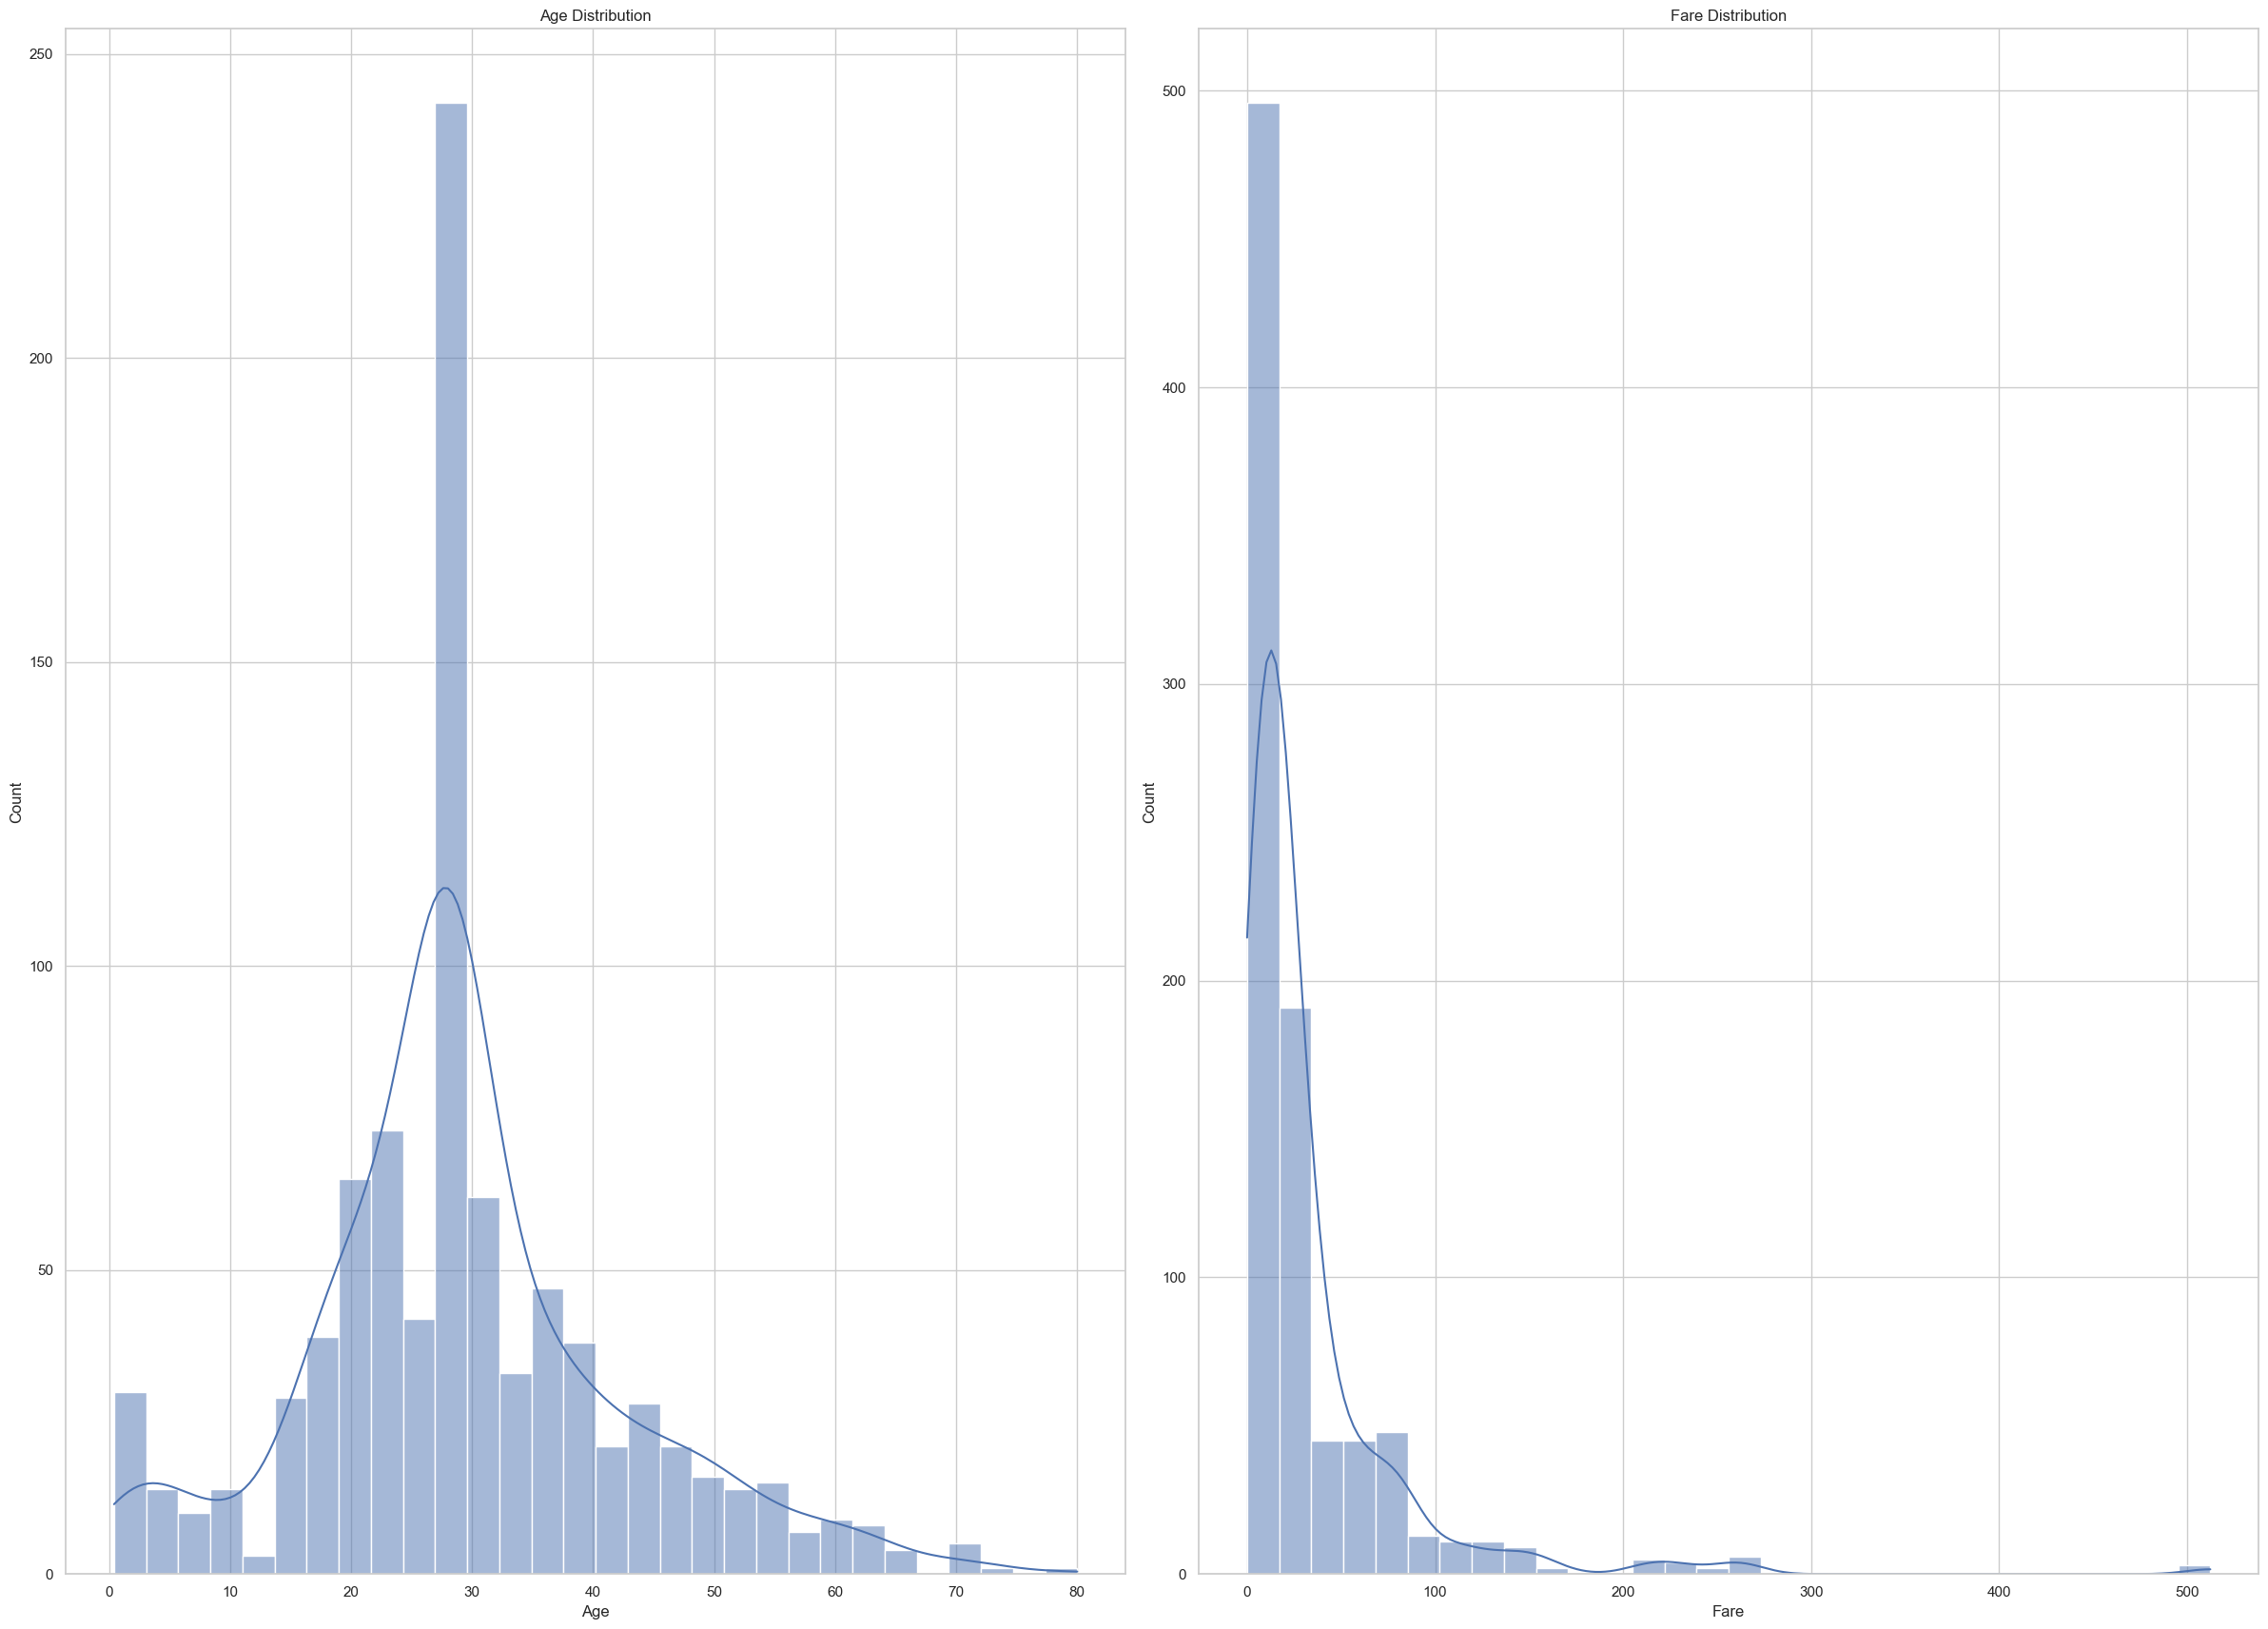

In [28]:
print("\nAnalyzing the Numerical Features:")

fig , axes = plt.subplots(1,2,figsize=(24,18))
sns.histplot(ax=axes[0],x='Age',data=titanic_df,kde=True,bins=30).set_title('Age Distribution')
sns.histplot(ax=axes[1],x='Fare',data=titanic_df,kde=True,bins=30).set_title('Fare Distribution')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


Bivariate Analysis: Feature vs. Survival


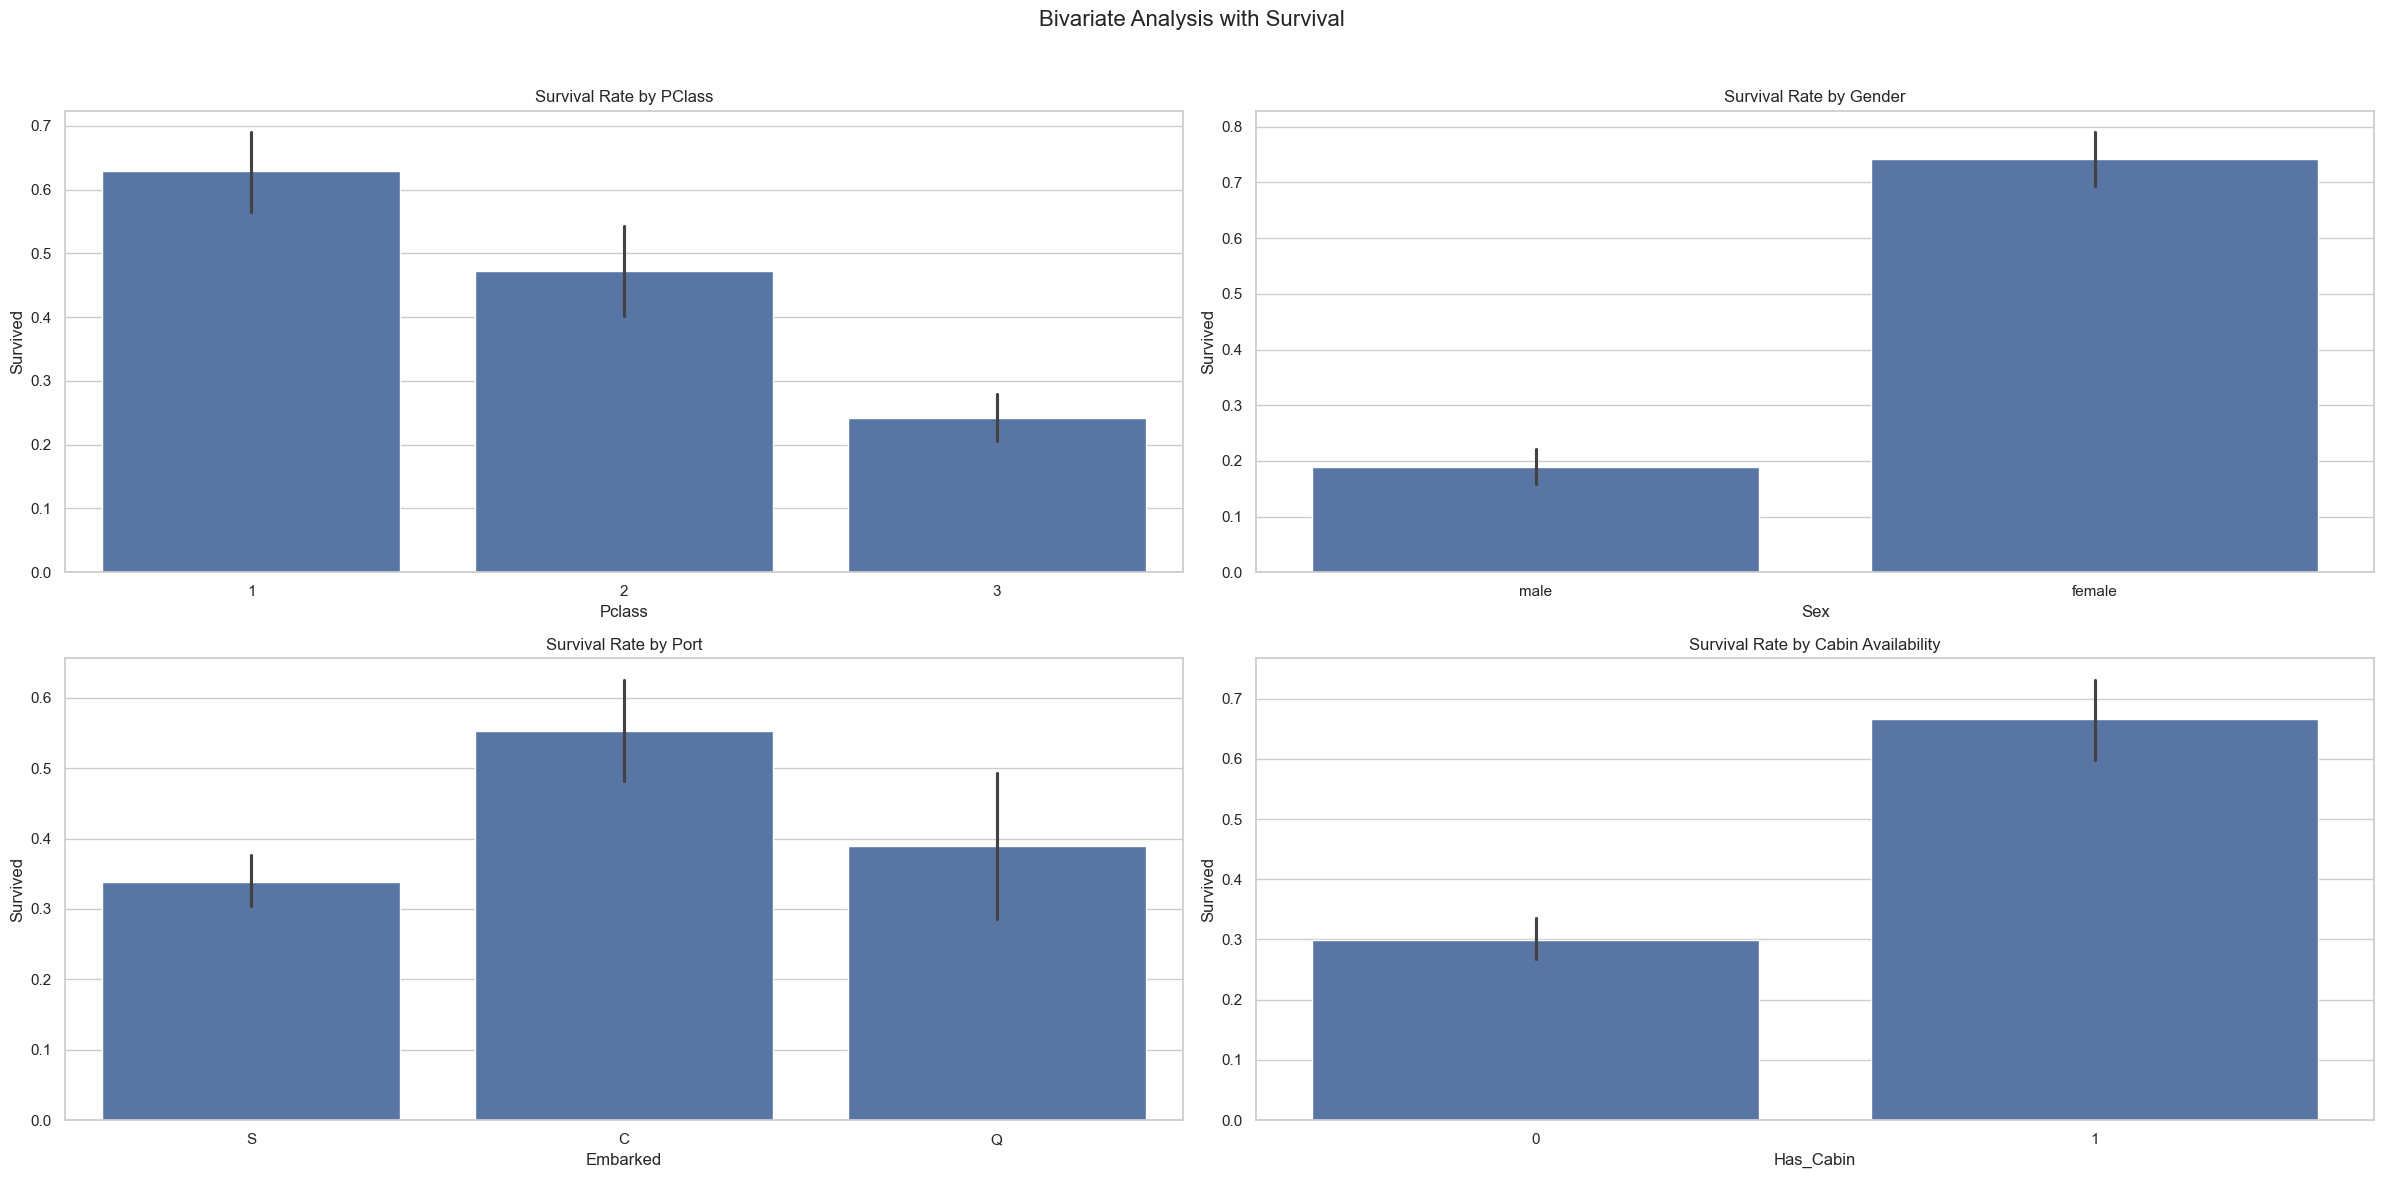

In [32]:
##Bivariate Analysis - analyze two variables individually to understand its distribution

print("\nBivariate Analysis: Feature vs. Survival")

fig , axes = plt.subplots(2,2,figsize=(24,12))
fig.suptitle("Bivariate Analysis with Survival" , fontsize=(16))

sns.barplot(ax=axes[0,0],x='Pclass',y='Survived',data=titanic_df).set_title('Survival Rate by PClass')
sns.barplot(ax=axes[0,1],x='Sex',y='Survived',data=titanic_df).set_title('Survival Rate by Gender')
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_df).set_title('Survival Rate by Port')
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=titanic_df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

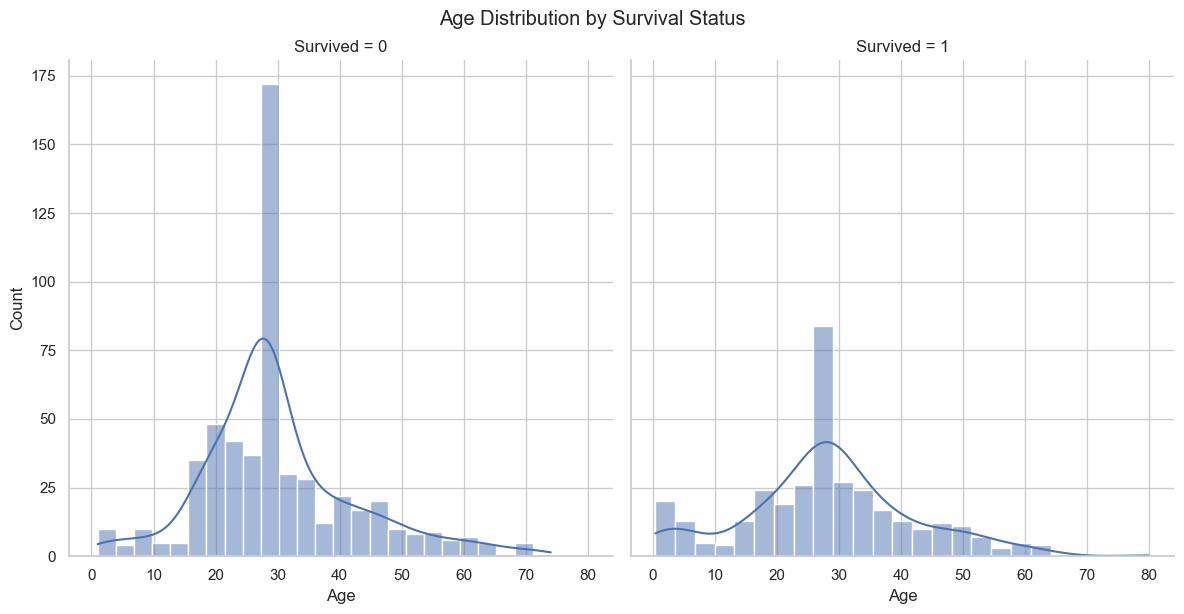

In [33]:
# Age vs. Survival
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

In [34]:
#### Deeper Dive: Outlier Analysis for 'Fare'
# The `.describe()` function and histogram showed that `Fare` has extreme outliers. Let's visualize this clearly with a box plot.

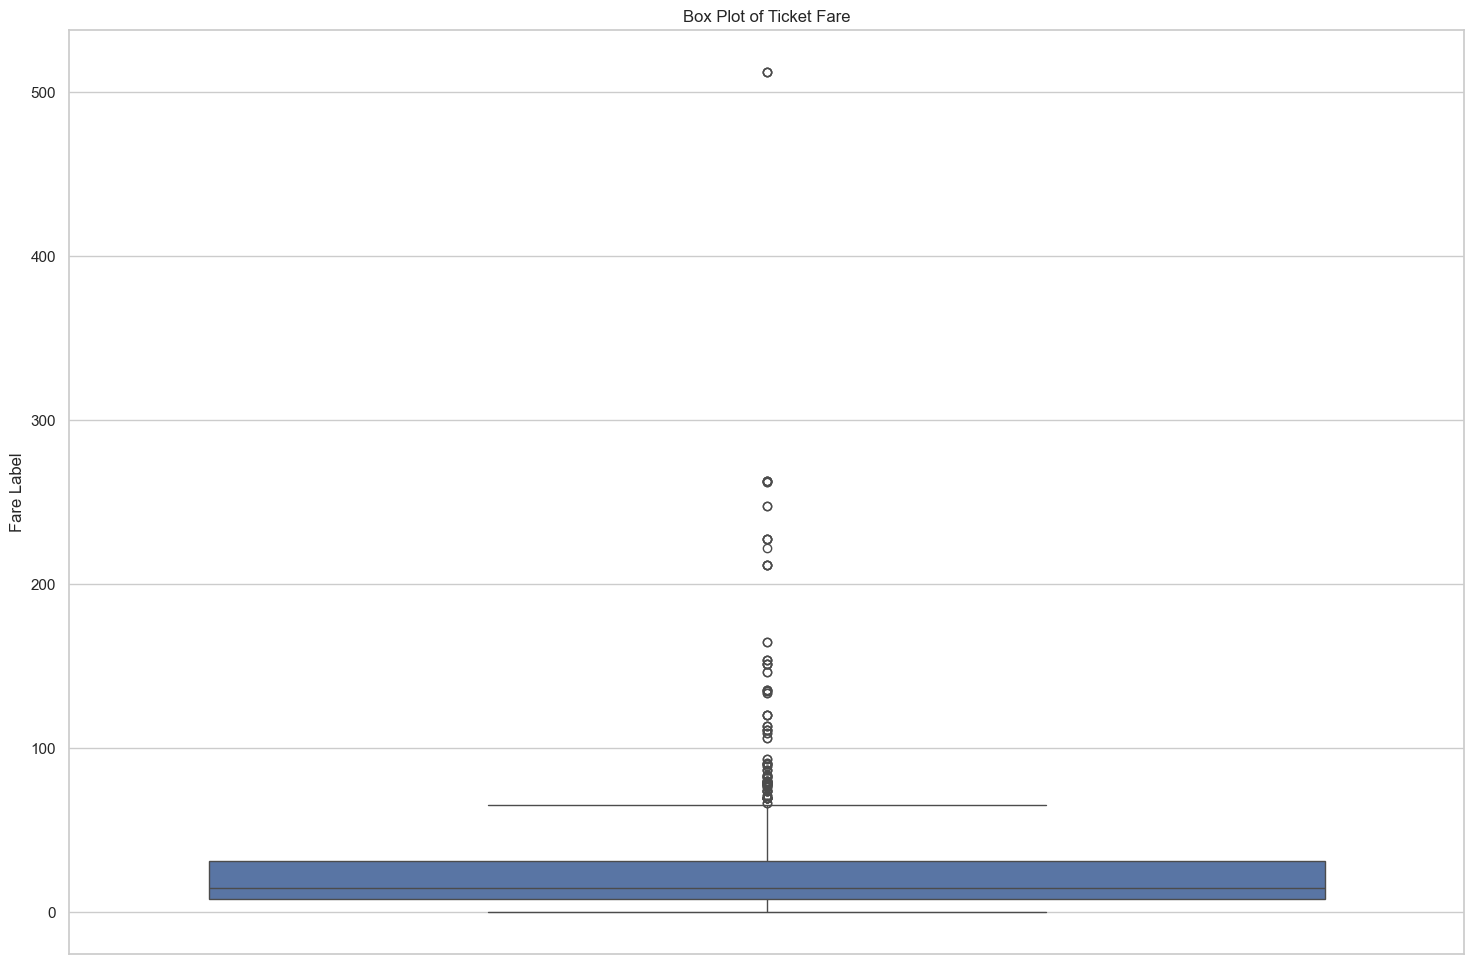

In [35]:
plt.figure(figsize=(18,12))
sns.boxplot(y='Fare',data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare Label')
plt.show()

In [36]:
##We can conclude that the Fare attribute has many outliers but majority of data is concentrated at 100 and below 100

In [37]:
#STEP 6 : FEATURE ENGINEERING
# 1. Create a 'FamilySize' feature . FamilySize = total number of family members so here we add the Parents/Children count and Siblings/Spouse count
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # +1 for the person themselves

# 2. Create an 'IsAlone' feature
titanic_df['IsAlone']=0
titanic_df.loc[titanic_df['FamilySize']==1,'IsAlone']=1

print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


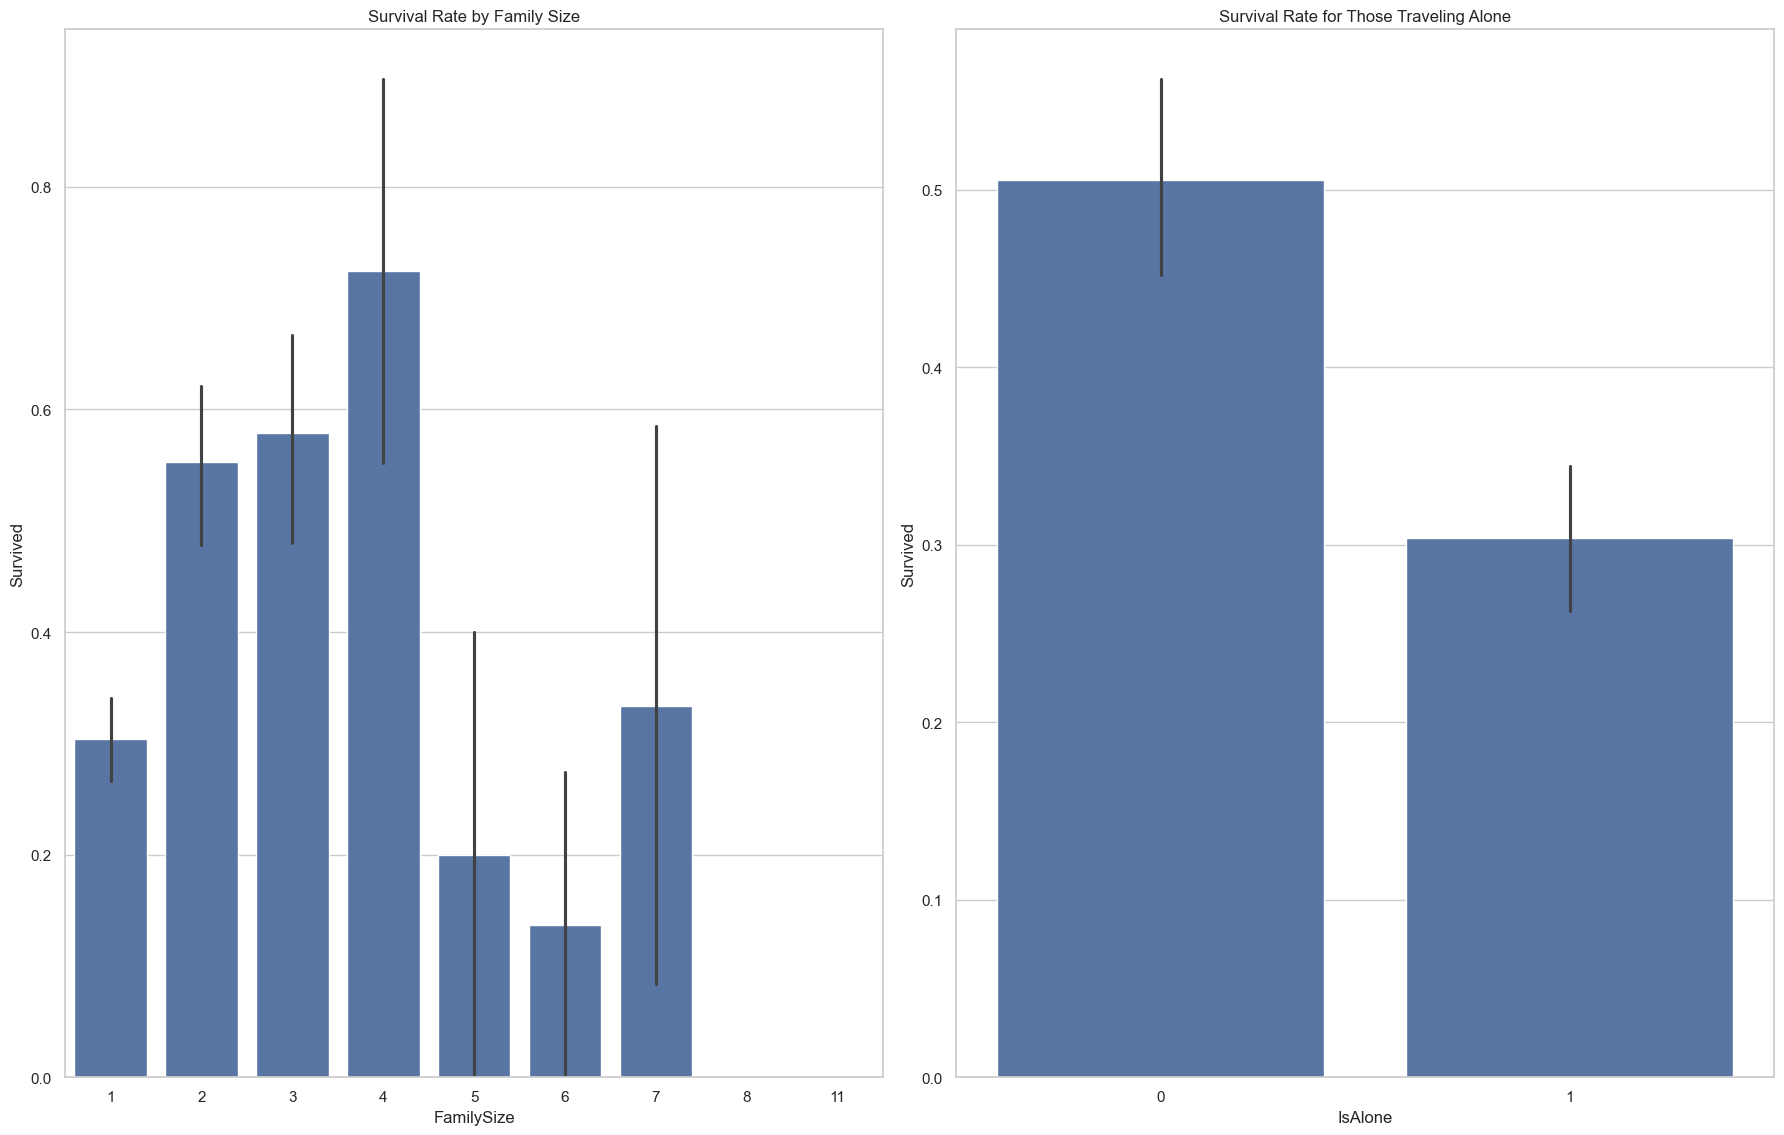

In [38]:
fig , axes = plt.subplots(1,2,figsize=(18,12))

sns.barplot(ax=axes[0],x='FamilySize',y='Survived',data=titanic_df).set_title('Survival Rate by Family Size')
sns.barplot(ax=axes[1],x='IsAlone',y='Survived',data=titanic_df).set_title('Survival Rate for Those Traveling Alone')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [39]:
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

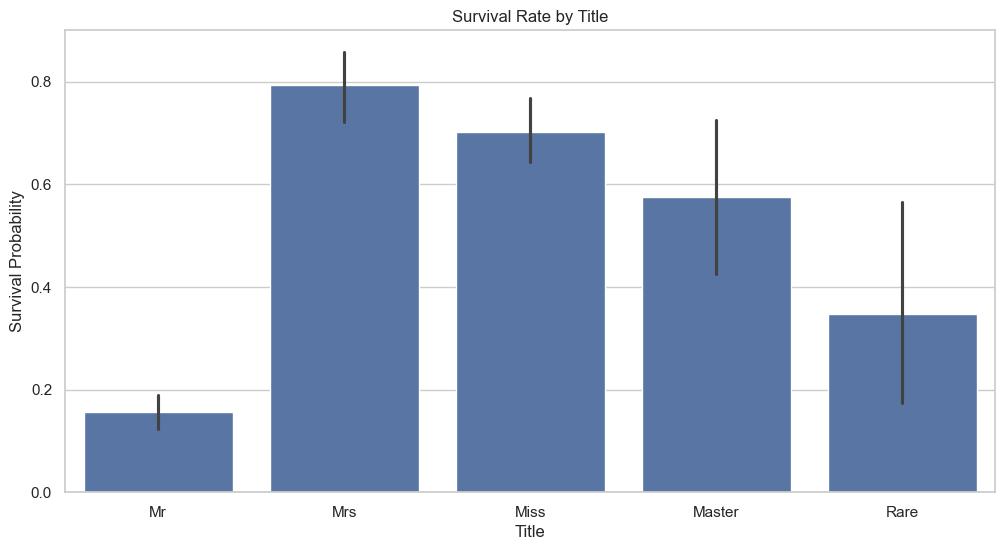

In [40]:
#replace the titles to 'Rare' if there count is less 
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

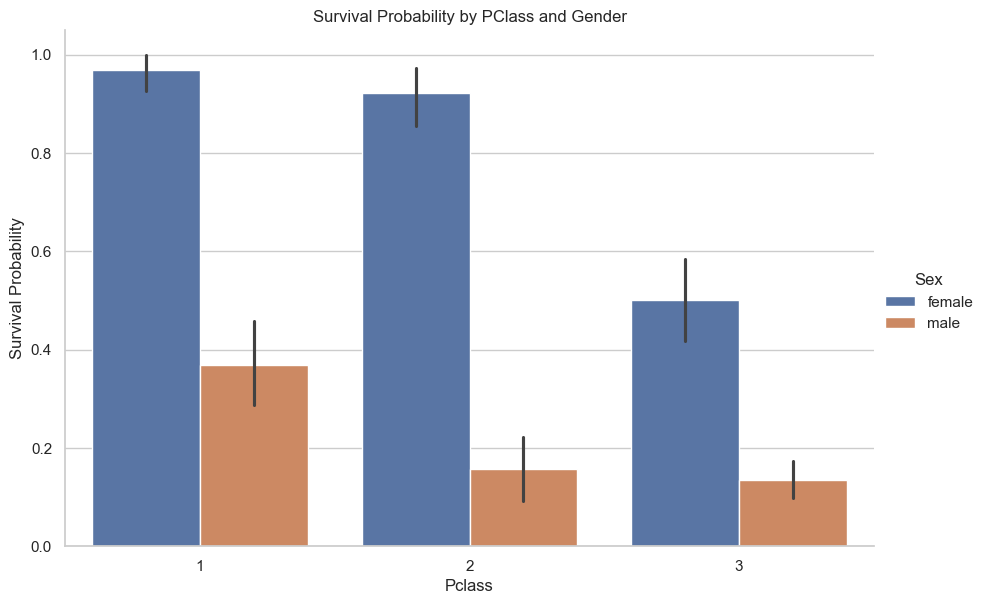

In [41]:
#STEP 7 : MULTIVARIATE ANALYSIS
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df,kind='bar',height=6,aspect=1.5)
plt.title('Survival Probability by PClass and Gender')
plt.ylabel('Survival Probability')
plt.show()

In [42]:
# We can conclude that Females in all classes had a significantly higher survival rate than Males.

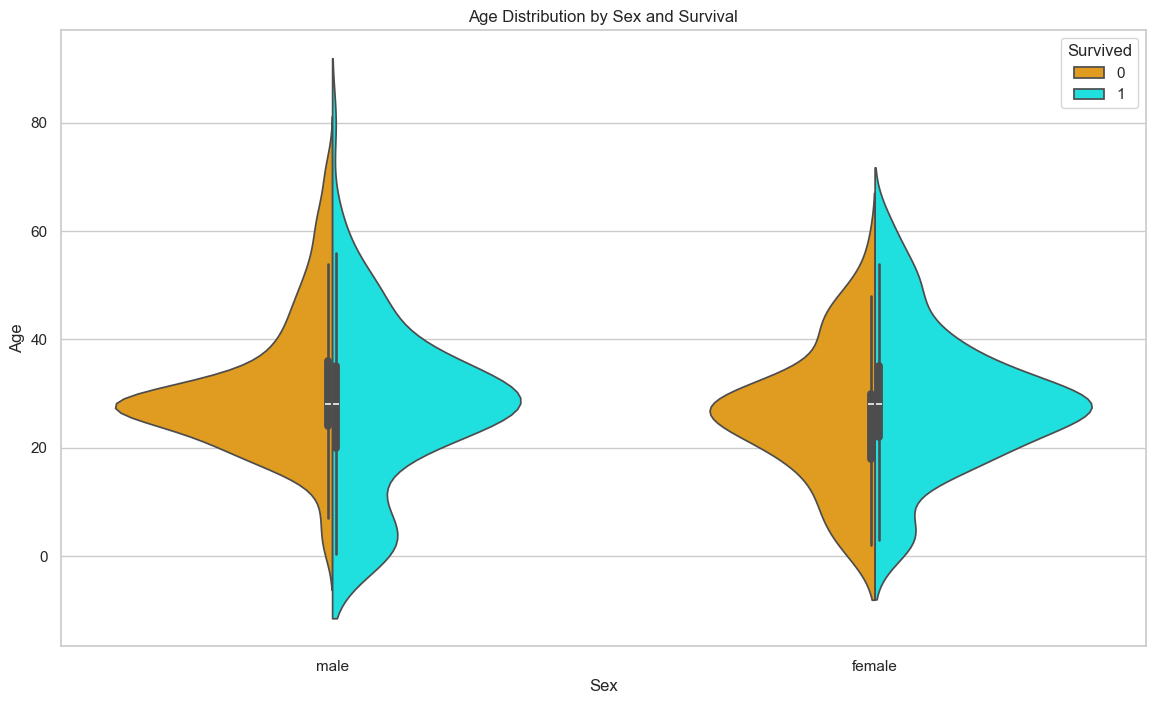

In [46]:
plt.figure(figsize=(14,8))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic_df,split=True,palette={0:'orange',1:'cyan'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

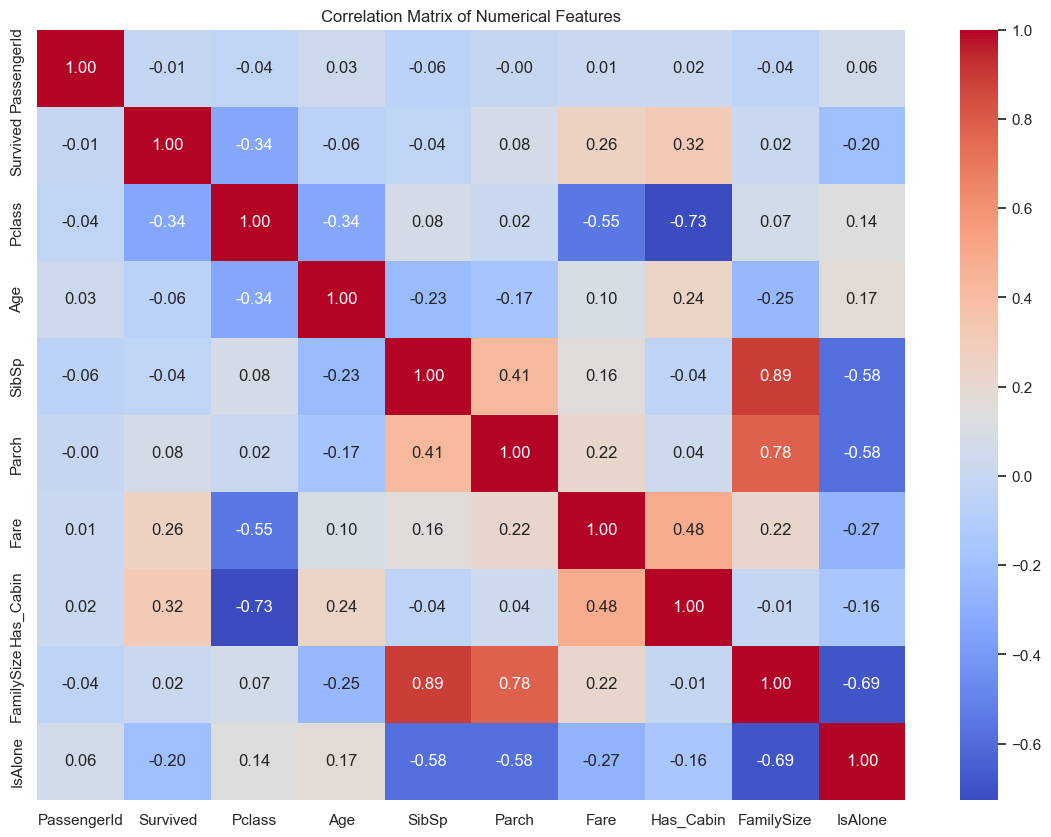

In [47]:
# STEP 8 : CORRELATION ANALYSIS
plt.figure(figsize=(14,10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()